# DIP Assignment 4
# 2023702018
# Janaksinh Ven

In [83]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import time
path = r"D:\Digital Image Processing\Assignments\a4-Janak1911\images\\"

## Task 1: Image Segmentation Using Thresholding (20 Marks)

 (a) Load agrayscale image and implement the following thresholding meth
ods to segment the image:
 * Binary Thresholding
 * Adaptive Thresholding
 * Otsu’s Thresholding  
 (10 Marks)

(b) Display the original and segmented images side by side for comparison,
 ensuring each method is clearly labeled. (5 Marks)  
 (c) In 2-3 sentences, discuss which method provided the best segmenta
tion for your image and why. Consider factors like clarity of object
 boundaries and noise levels. (5 Marks)

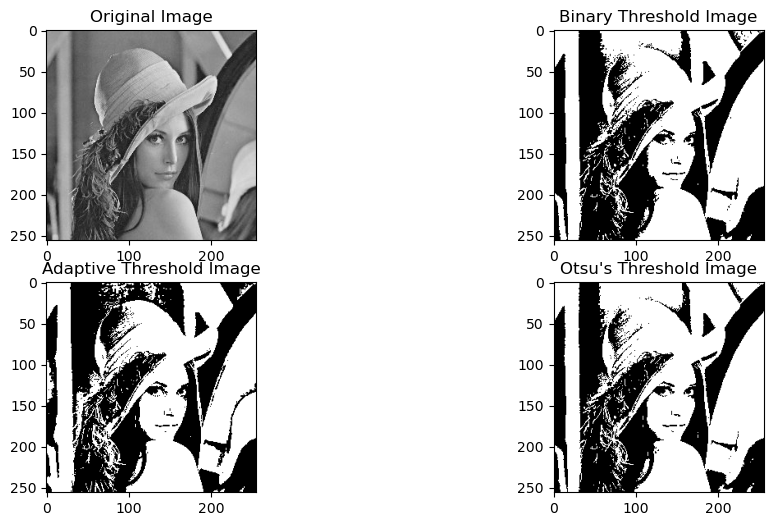

In [15]:
img = cv2.imread(path+"gray_scale_image_a4.jpg",cv2.IMREAD_GRAYSCALE)
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY) 
plt.figure(figsize=(12, 6))
plt.subplot(2,2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(2, 2, 2)
plt.title("Binary Threshold Image")
plt.imshow(thresh1, cmap='gray')
thresh2=cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                          cv2.THRESH_BINARY, 199, 5) 

plt.subplot(2, 2, 3)
plt.title("Adaptive Threshold Image")
plt.imshow(thresh2, cmap='gray')
ret, thresh3 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU) 

plt.subplot(2, 2, 4)
plt.title("Otsu's Threshold Image")
plt.imshow(thresh3, cmap='gray')
plt.show()

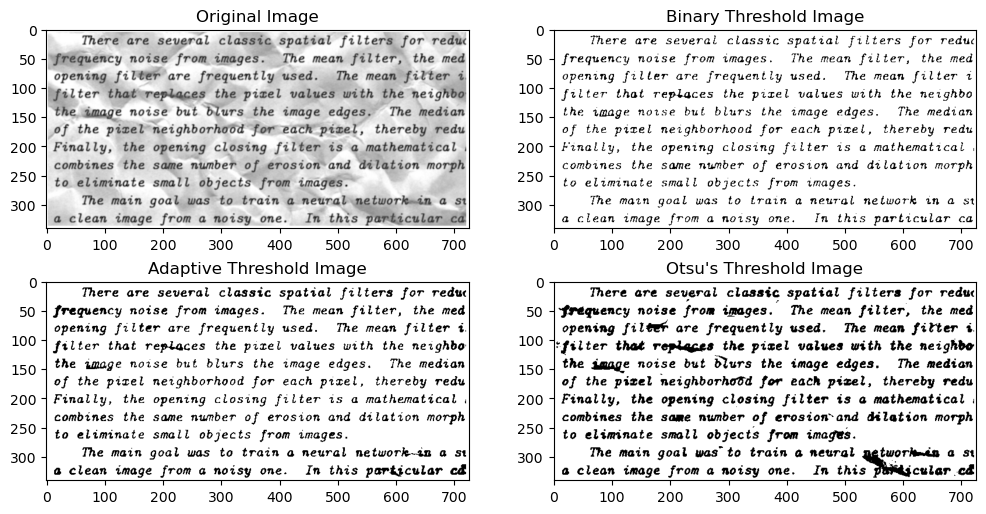

In [34]:
img = cv2.imread(path+"text_doc.png",cv2.IMREAD_GRAYSCALE)
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY) 
plt.figure(figsize=(12, 6))
plt.subplot(2,2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(2, 2, 2)
plt.title("Binary Threshold Image")
plt.imshow(thresh1, cmap='gray')
thresh2=cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                          cv2.THRESH_BINARY, 199, 70) 

plt.subplot(2, 2, 3)
plt.title("Adaptive Threshold Image")
plt.imshow(thresh2, cmap='gray')
ret, thresh3 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU) 

plt.subplot(2, 2, 4)
plt.title("Otsu's Threshold Image")
plt.imshow(thresh3, cmap='gray')
plt.show()

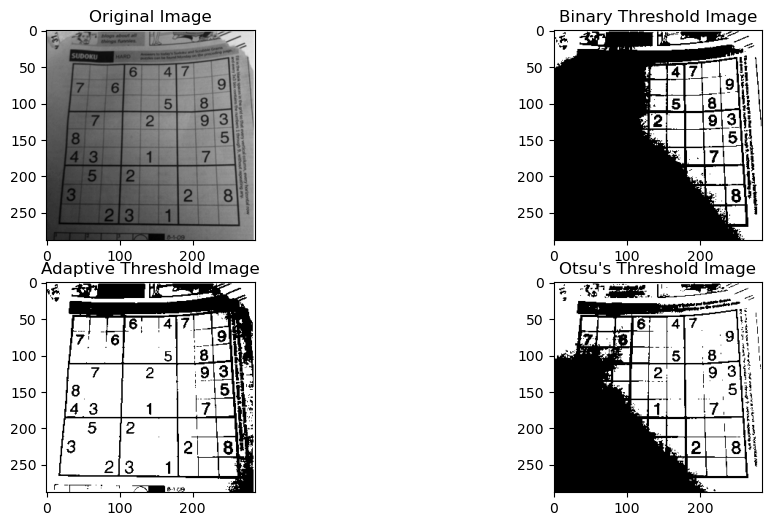

In [29]:
img = cv2.imread(path+"noisy_doc.png",cv2.IMREAD_GRAYSCALE)
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY) 
plt.figure(figsize=(12, 6))
plt.subplot(2,2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(2, 2, 2)
plt.title("Binary Threshold Image")
plt.imshow(thresh1, cmap='gray')
thresh2=cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                          cv2.THRESH_BINARY, 199, 30) 

plt.subplot(2, 2, 3)
plt.title("Adaptive Threshold Image")
plt.imshow(thresh2, cmap='gray')
ret, thresh3 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU) 

plt.subplot(2, 2, 4)
plt.title("Otsu's Threshold Image")
plt.imshow(thresh3, cmap='gray')
plt.show()

The best segmentation method depends on the type of image:
* For document images, Adaptive Thresholding provided the best results as it handled uneven illumination effectively, ensuring clear and consistent text segmentation.
* For face images, Otsu’s Thresholding was most effective in segmenting regions with distinct intensity variations, producing well-defined object boundaries with minimal noise.
* Binary Thresholding, though simple, struggled with varying illumination, making it less suitable for complex images.

## Task 2: Line Detection Using Hough Transform (20 Marks)
 * (a) Write a function to detect and highlight straight lines in an image
 using the Hough Line Transform. Make sure to use the Canny edge
 detector to preprocess the image before applying the Hough Transform.
 (10 Marks)
 * (b) Test your function on an image with clear straight lines, such as a
 road, building, or grid structure. Display the original image and the
 processed image with highlighted lines. (5 Marks)
 * (c) Experiment with different threshold parameters in the Hough Transform to optimize line detection. In 2-3 sentences, describe the parameter changes and how they affected the results. (5 Marks)

In [50]:
def detect_lines_hough(image_path, canny_threshold1=50, canny_threshold2=150, 
                       rho=1, theta=np.pi/180, threshold=100, min_line_length=50, max_line_gap=30):

    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    edges = cv2.Canny(gray, canny_threshold1, canny_threshold2)
    
    lines = cv2.HoughLinesP(edges, rho, theta, threshold, minLineLength=min_line_length, maxLineGap=max_line_gap)
    
    line_img = np.copy(img)
    
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    return img, edges, line_img


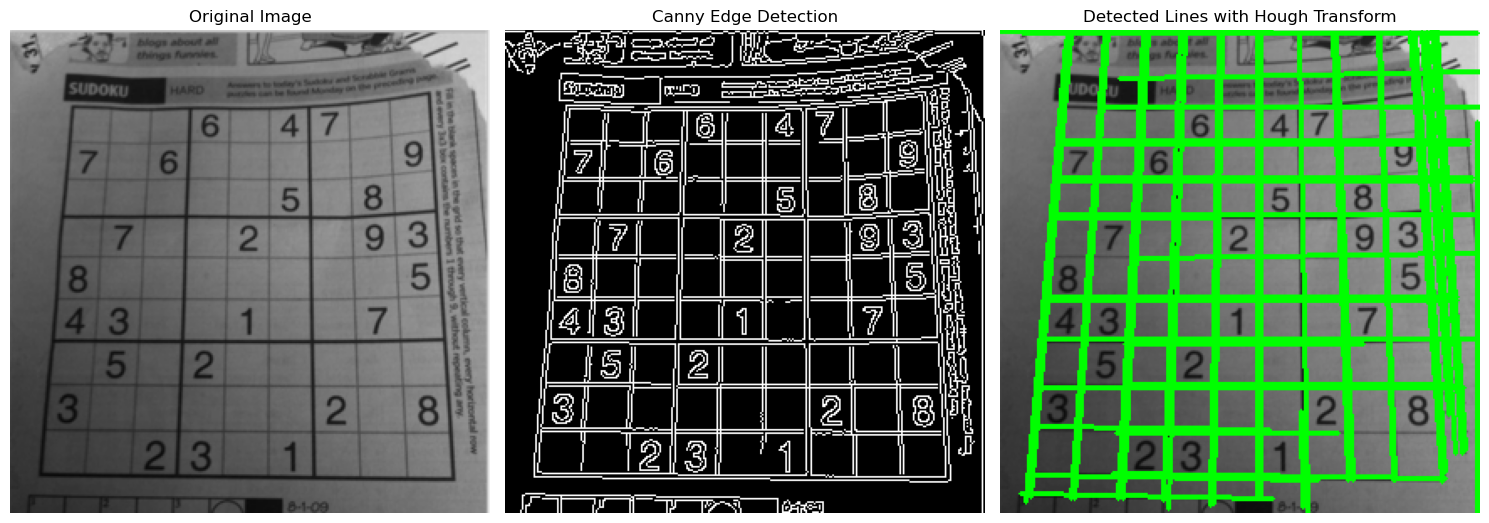

In [56]:

image_path = path+"noisy_doc.png"  
original_img, edges_img, line_detected_img = detect_lines_hough(image_path,canny_threshold1=30,
                                                                 canny_threshold2=100)
def plot_the_imgs(original_img, edges_img, line_detected_img):
    plt.figure(figsize=(15, 10))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(edges_img, cmap='gray')
    plt.title("Canny Edge Detection")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(line_detected_img, cv2.COLOR_BGR2RGB))
    plt.title("Detected Lines with Hough Transform")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
plot_the_imgs(original_img, edges_img, line_detected_img)

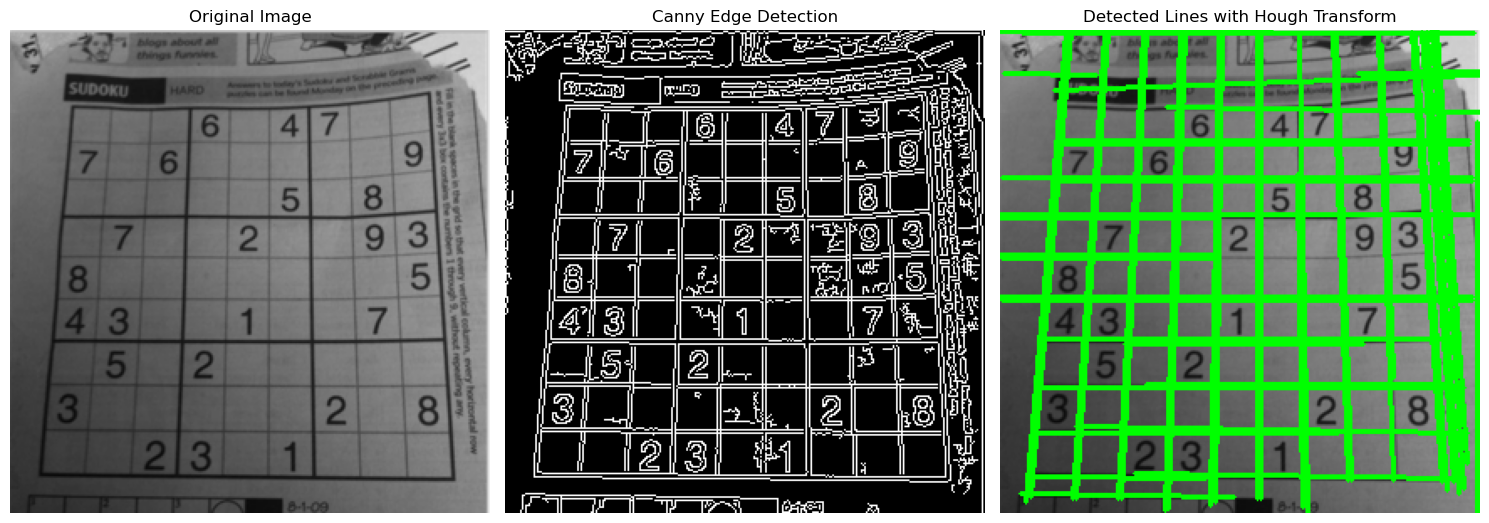

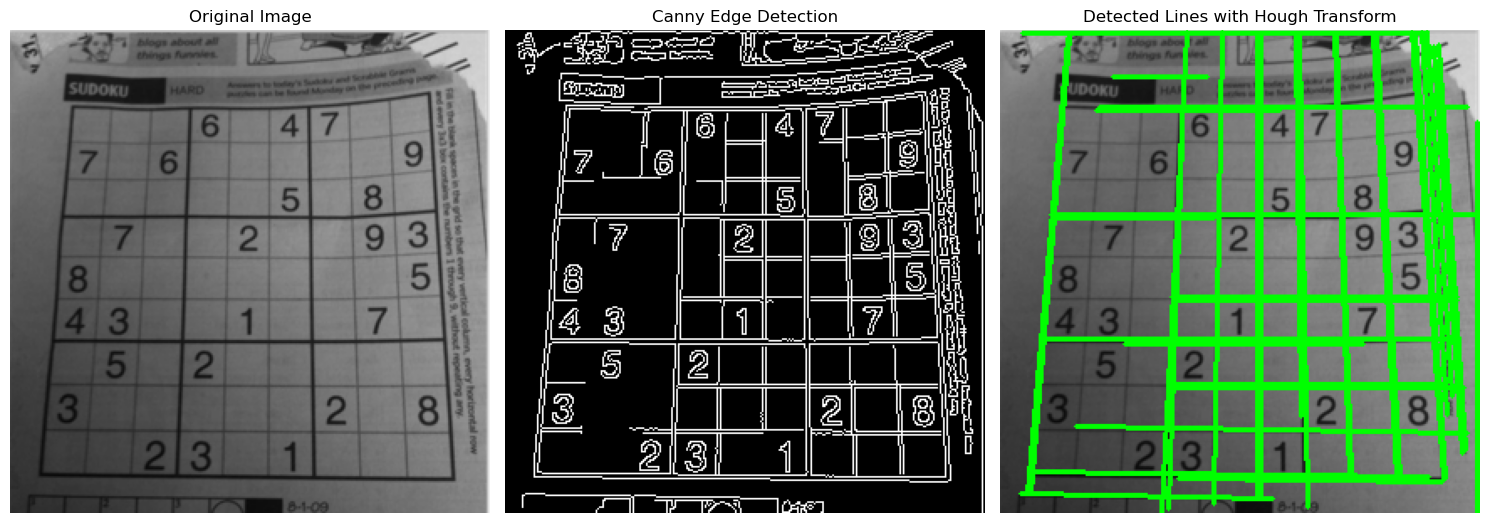

In [58]:
"""Decreasing the thresolds of canny"""

image_path = path+"noisy_doc.png"  
original_img, edges_img, line_detected_img = detect_lines_hough(image_path,canny_threshold1=10, 
                                                                    canny_threshold2=40)
plot_the_imgs(original_img, edges_img, line_detected_img)

"""Increasing the thresolds of canny"""
original_img, edges_img, line_detected_img = detect_lines_hough(image_path,canny_threshold1=70, 
                                                                    canny_threshold2=180)
plot_the_imgs(original_img, edges_img, line_detected_img)


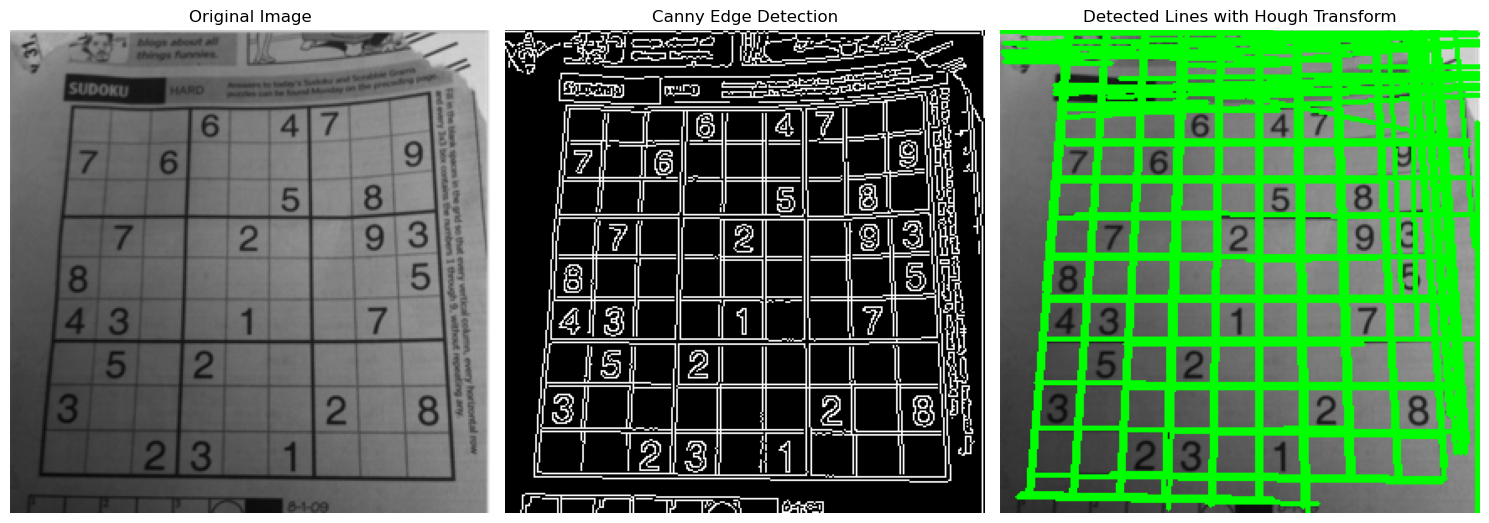

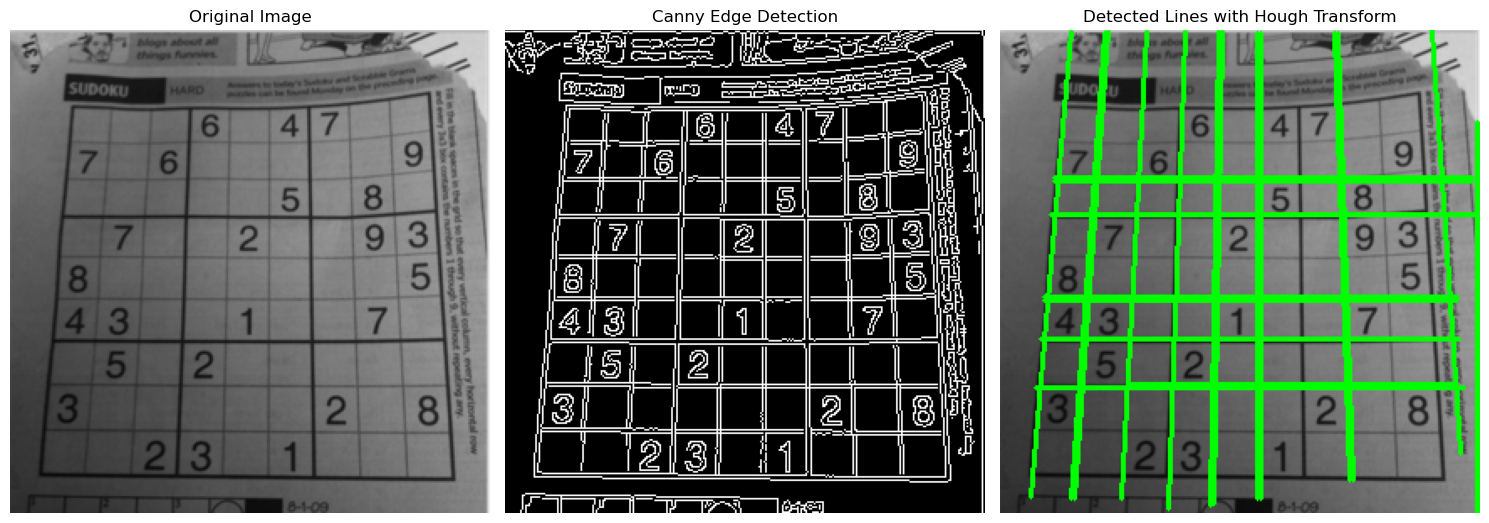

In [59]:
"""reducing the thresolds of hough transform"""

image_path = path+"noisy_doc.png"  
original_img, edges_img, line_detected_img = detect_lines_hough(image_path,canny_threshold1=30, 
                                                                    canny_threshold2=80, threshold=50)
plot_the_imgs(original_img, edges_img, line_detected_img)

"""increasing the thresolds of hough transform"""

image_path = path+"noisy_doc.png"  
original_img, edges_img, line_detected_img = detect_lines_hough(image_path,canny_threshold1=30, 
                                                                    canny_threshold2=80, threshold=150)
plot_the_imgs(original_img, edges_img, line_detected_img)



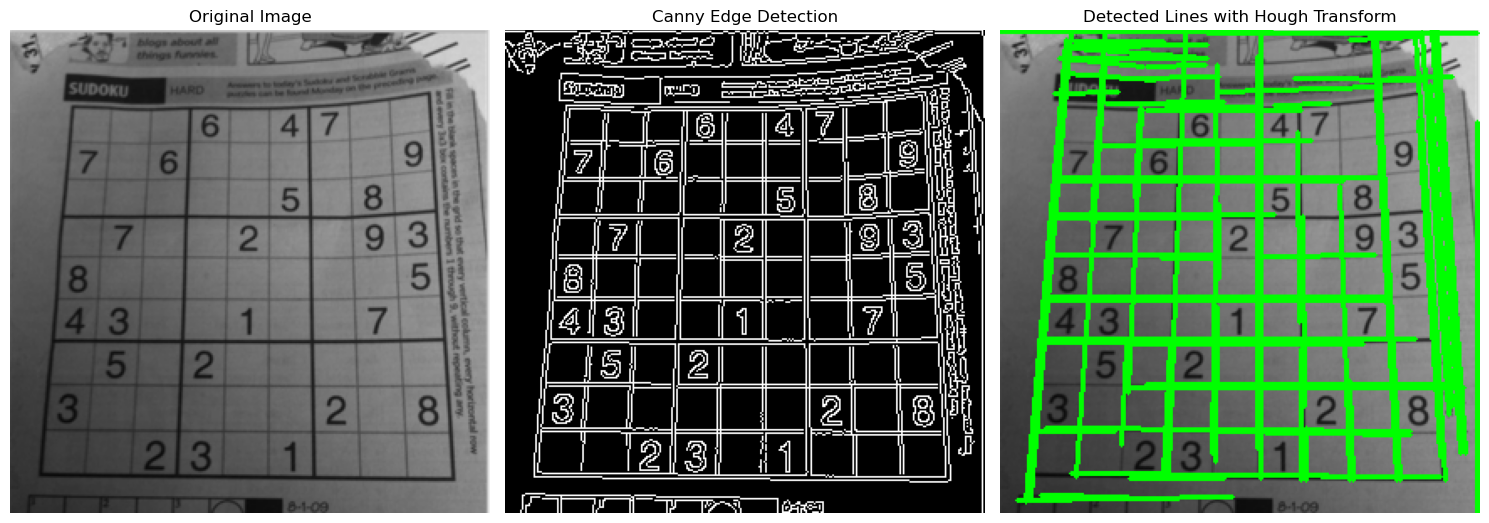

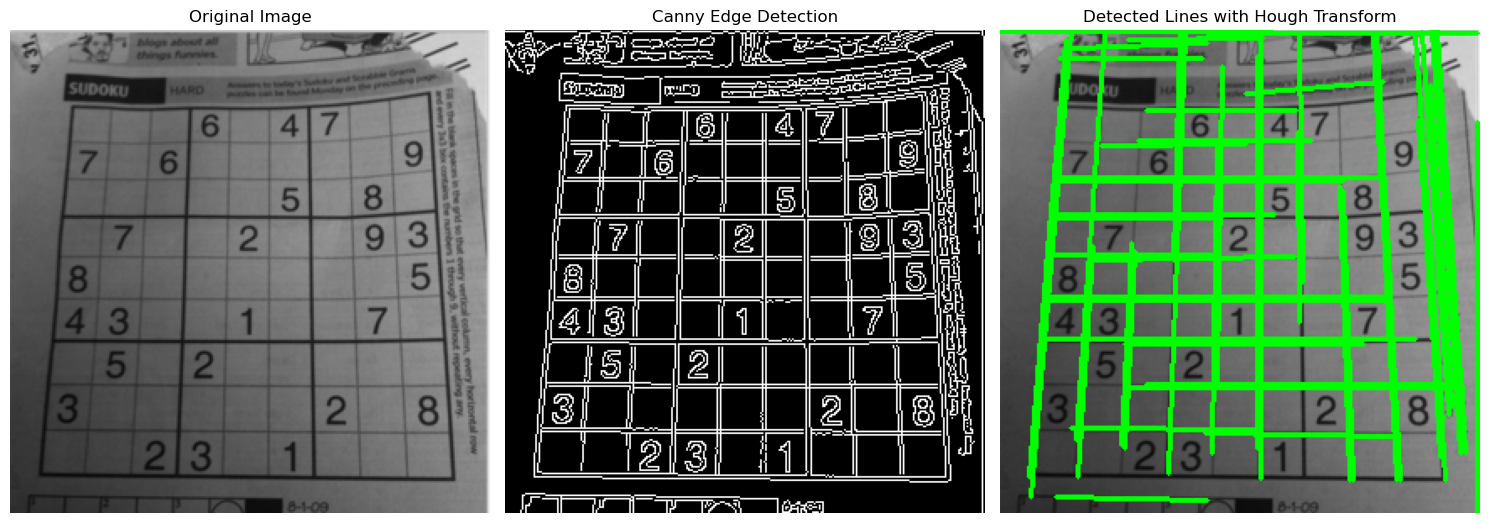

In [60]:
"""Decreasing the minimum line length """

image_path = path+"noisy_doc.png"  
original_img, edges_img, line_detected_img = detect_lines_hough(image_path,canny_threshold1=30, 
                                                                    canny_threshold2=80, threshold=80,
                                                                    min_line_length=30, max_line_gap=10)
plot_the_imgs(original_img, edges_img, line_detected_img)

"""Increasing the minimum line length """

image_path = path+"noisy_doc.png"  
original_img, edges_img, line_detected_img = detect_lines_hough(image_path,canny_threshold1=30, 
                                                                    canny_threshold2=80, threshold=80,
                                                                    min_line_length=80, max_line_gap=10)
plot_the_imgs(original_img, edges_img, line_detected_img)


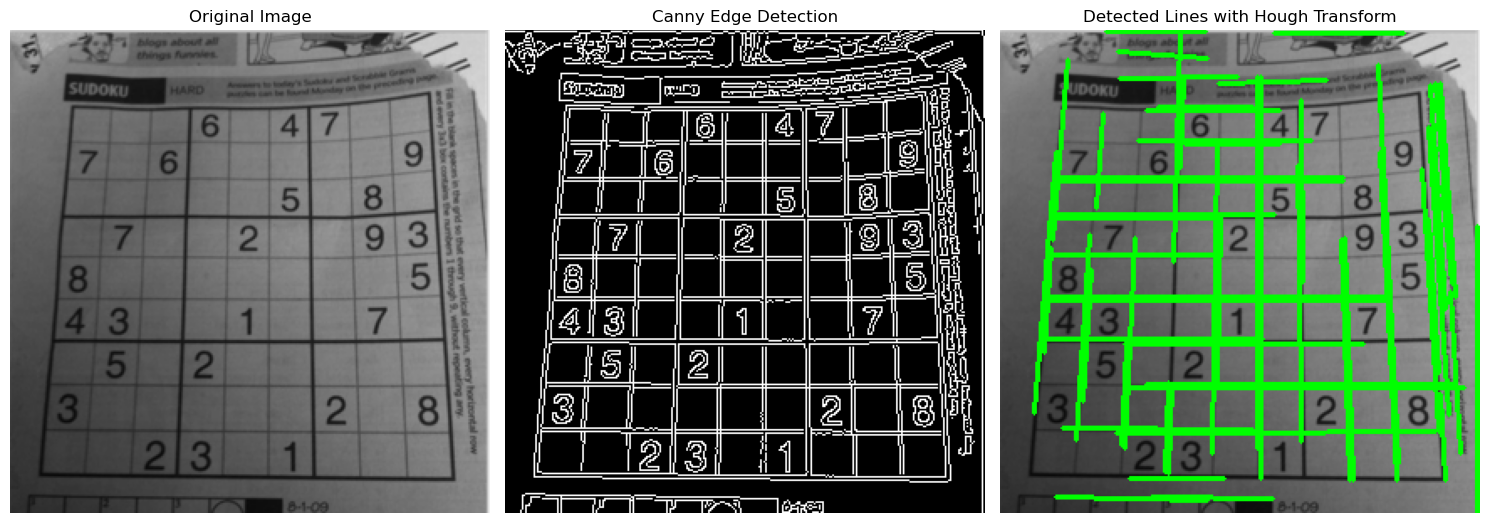

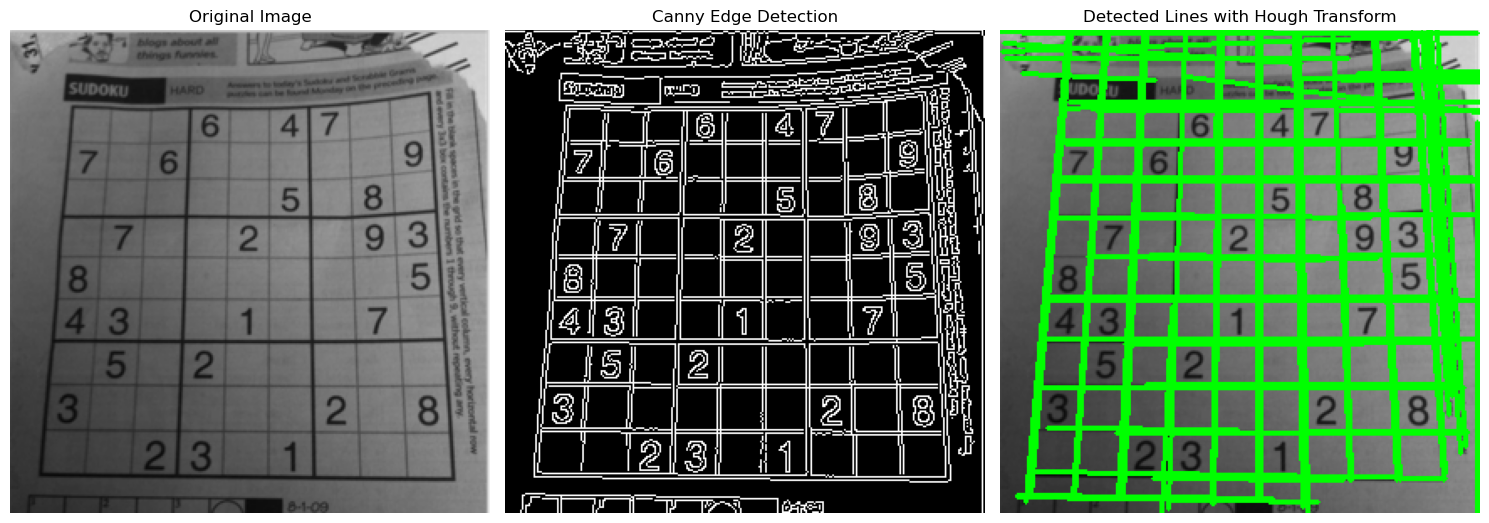

In [61]:
"""Decreasing the maximum line gap """

image_path = path+"noisy_doc.png"  
original_img, edges_img, line_detected_img = detect_lines_hough(image_path,canny_threshold1=30, 
                                                                    canny_threshold2=80, threshold=80,
                                                                    min_line_length=50, max_line_gap=5)
plot_the_imgs(original_img, edges_img, line_detected_img)

"""Increasing the maximum line gap """

image_path = path+"noisy_doc.png"  
original_img, edges_img, line_detected_img = detect_lines_hough(image_path,canny_threshold1=30, 
                                                                    canny_threshold2=80, threshold=80,
                                                                    min_line_length=50, max_line_gap=30)
plot_the_imgs(original_img, edges_img, line_detected_img)

Experimentation with parameters showed the following effects:

* Threshold (canny_threshold1, canny_threshold2): Reducing the thresholds captured more edges but increased noise. Optimal values provided clear edges for line detection.
* threshold (Hough Transform): Increasing this focused on stronger lines but missed finer details. Lowering it detected more lines, including unwanted ones.
* minLineLength and maxLineGap: Higher values for minLineLength reduced detection of short, insignificant lines, while decreasing maxLineGap ensured lines were not overly broken.

## Task 3: Circle Detection Using Hough Circle Transform (20 Marks)
 * (a) Implement a function to detect circles in an image using the Hough
 Circle Transform. Use suitable preprocessing steps (e.g., smoothing)
 to improve detection accuracy. (10 Marks)
 * (b) Apply your function to an image with circular objects (e.g., coins,
 wheels, or round signs). Display the original image and the processed
 image with detected circles overlaid. (5 Marks)
 * (c) Experiment with different radius ranges and accumulator thresholds.
 Display the results with and without these adjustments, and briefly
 explain any improvements observed. (5 Marks)

In [ ]:
def detect_circles_hough(image_path, dp=1.2, min_dist=50, param1=100, param2=30, min_radius=10, max_radius=50):

    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (9, 9), 2)

    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp, min_dist, 
                               param1=param1, param2=param2, 
                               minRadius=min_radius, maxRadius=max_radius)

    circle_img = np.copy(img)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            x, y, radius = circle
            cv2.circle(circle_img, (x, y), radius, (0, 255, 0), 2)
            cv2.circle(circle_img, (x, y), 2, (0, 0, 255), 3)
    
    return img, circle_img


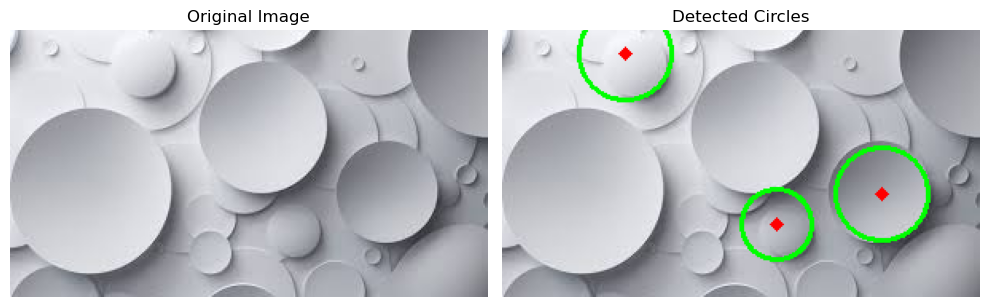

In [ ]:
def show_plots(original_img, circle_detected_img):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(circle_detected_img, cv2.COLOR_BGR2RGB))
    plt.title("Detected Circles")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

image_path = path+"circle_img.jpeg"  
original_img, circle_detected_img = detect_circles_hough(image_path, dp=1.2, min_dist=50, 
                                                        param1=100, param2=20, min_radius=10, max_radius=50)
show_plots(original_img, circle_detected_img)

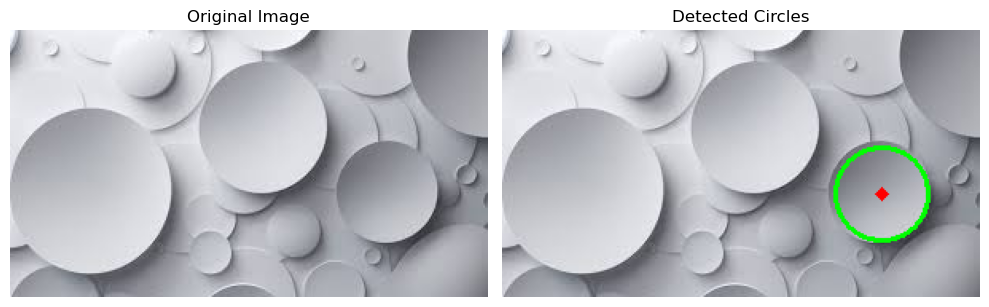

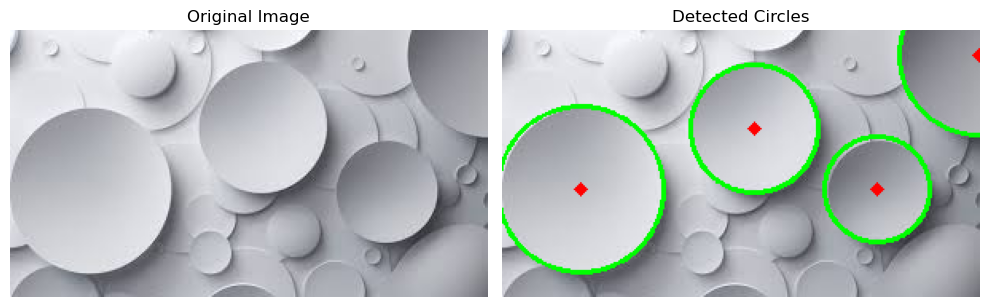

In [ ]:
"""Experiment with Radius Range"""
# Decrease the range
image_path = path+"circle_img.jpeg"  
original_img, circle_detected_img = detect_circles_hough(image_path, dp=1.2, min_dist=50, 
                                                        param1=100, param2=30, min_radius=15, max_radius=30)
show_plots(original_img, circle_detected_img)

#Increase the range
image_path = path+"circle_img.jpeg"  
original_img, circle_detected_img = detect_circles_hough(image_path, dp=1.2, min_dist=50, 
                                                        param1=100, param2=30, min_radius=5, max_radius=80)
show_plots(original_img, circle_detected_img)

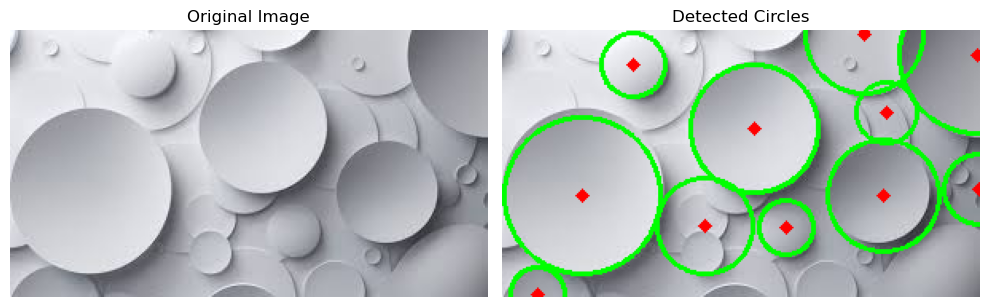

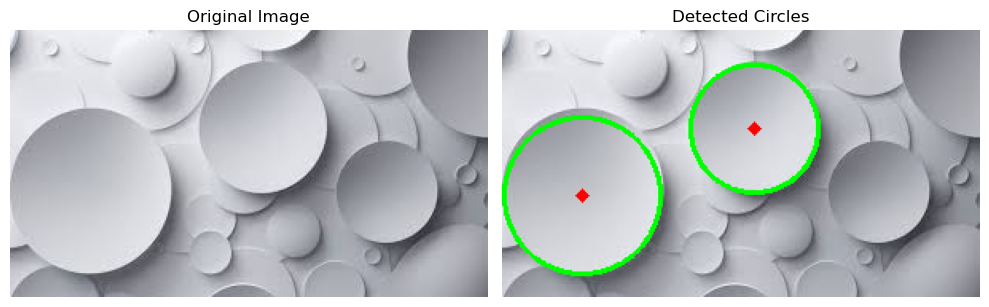

In [81]:
"""Experiment with Accumulator threshold(param2)"""
# Decrease 
image_path = path+"circle_img.jpeg"  
original_img, circle_detected_img = detect_circles_hough(image_path, dp=1.2, min_dist=50, 
                                                        param1=100, param2=10, min_radius=10, max_radius=50)
show_plots(original_img, circle_detected_img)

#Increase
image_path = path+"circle_img.jpeg"  
original_img, circle_detected_img = detect_circles_hough(image_path, dp=1.2, min_dist=50, 
                                                        param1=100, param2=50, min_radius=10, max_radius=50)
show_plots(original_img, circle_detected_img)

Execusion time: 0.006249427795410156


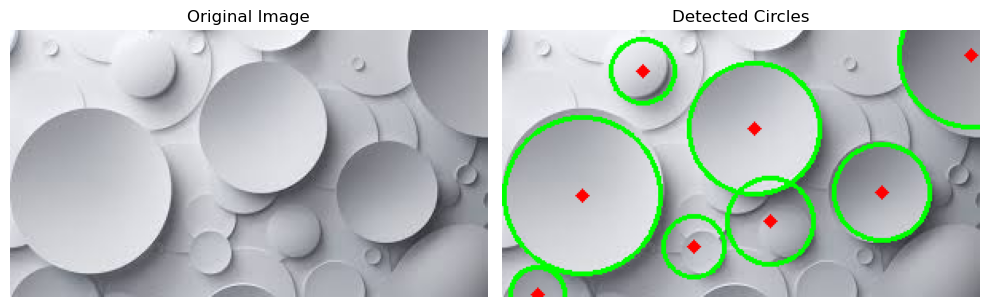

Execusion time: 0.0006039142608642578


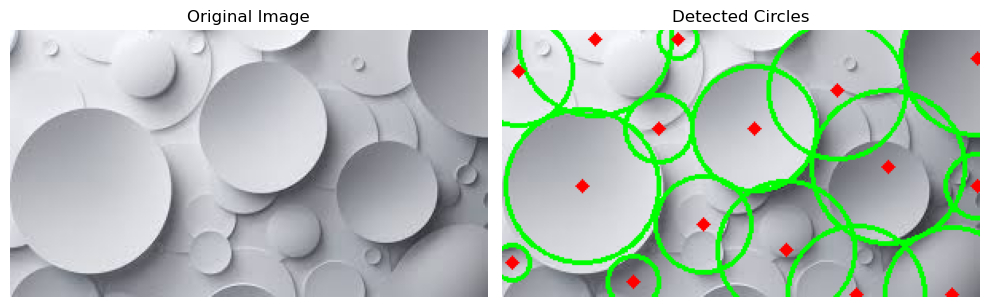

In [87]:
"""Experiment with dp(Resolution)"""
# Decrease
image_path = path+"circle_img.jpeg"  
start  = time.time()
original_img, circle_detected_img = detect_circles_hough(image_path, dp=0.5, min_dist=50, 
                                                        param1=100, param2=10, min_radius=10, max_radius=50)
print('Execusion time:',time.time()-start)
show_plots(original_img, circle_detected_img)

# Increase
image_path = path+"circle_img.jpeg"  
start  = time.time()
original_img, circle_detected_img = detect_circles_hough(image_path, dp=4, min_dist=50, 
                                                        param1=100, param2=10, min_radius=10, max_radius=50)
print('Execusion time:',time.time()-start)
show_plots(original_img, circle_detected_img)


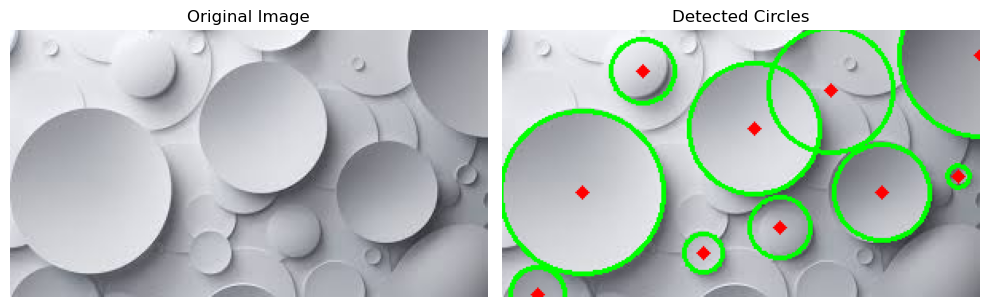

In [92]:
#final results
original_img, circle_detected_img = detect_circles_hough(image_path, dp=0.5, min_dist=50, 
                                                        param1=100, param2=10, min_radius=5, max_radius=100)
show_plots(original_img, circle_detected_img)

**Parameter Experimentation:**
* Radius Range (min_radius, max_radius): Expanding the range allowed detection of both small and large circles but increased false positives. Narrowing the range improved accuracy but excluded out-of-range circles.
* Accumulator Threshold (param2): Lowering the threshold increased sensitivity to weaker edges but led to more false positives. Increasing it reduced noise, detecting only strong circles.
* dp (Resolution): A higher value reduced processing time but missed finer details. A lower value detected smaller circles with better precision.  

**Results**
* Without adjustments: Detected some circles but missed smaller or fainter ones.
* With adjustments: Improved detection accuracy, especially for faint or overlapping circles.

## Task 4: Harris Corner Detection (20 Marks)
* (a) Create a function to detect and mark corners in an image using the
 Harris Corner Detection method. Use an appropriate method to
 mark the detected corners on the original image. (10 Marks)
* (b) Apply your function to an image with distinct corners, such as a chess
board or a building with strong edges and corners. Display the original
 and processed images with corners marked. (5 Marks)
* (c) Vary the sensitivity parameter (typically called k) in the Harris Corner
 Detection function. Observe how it affects corner detection, showing
 both original and altered results. Briefly explain your findings in 2-3
 sentences. (5 Marks)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_corners_harris(image_path, block_size=2, ksize=3, k=0.04, threshold=0.01):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    gray = np.float32(gray)
    corners = cv2.cornerHarris(gray, block_size, ksize, k)

    corner_img = np.copy(img)
    corner_img[corners > threshold * corners.max()] = [0, 0, 255]

    return img, corner_img


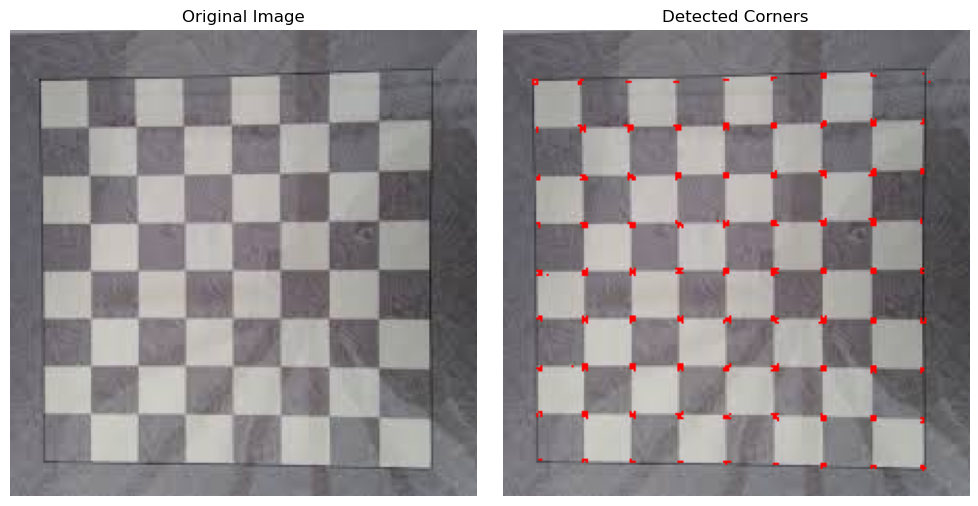

In [ ]:
image_path = path+"chess_board.jpeg" 
original_img, corner_detected_img = detect_corners_harris(image_path)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corner_detected_img, cv2.COLOR_BGR2RGB))
plt.title("Detected Corners")
plt.axis("off")

plt.tight_layout()
plt.show()


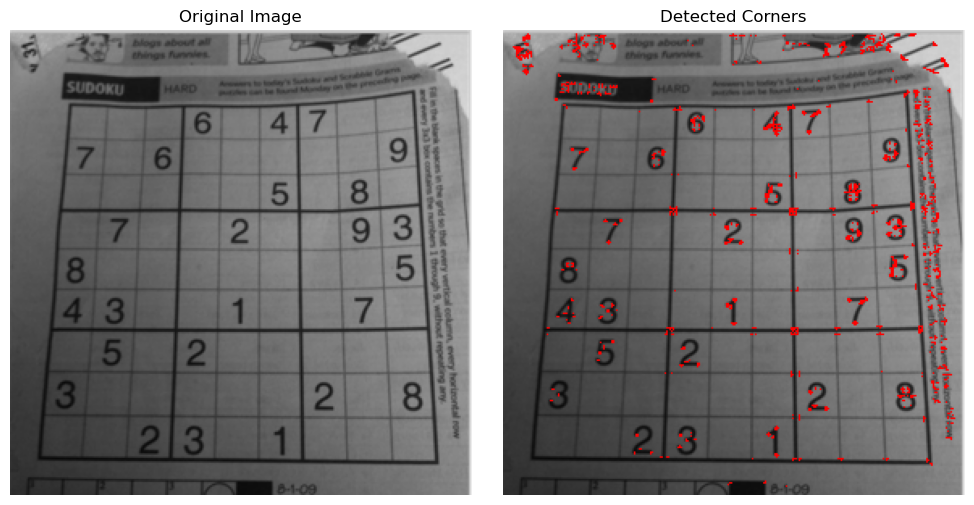

In [ ]:
image_path = path+"noisy_doc.png" 
original_img, corner_detected_img = detect_corners_harris(image_path)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corner_detected_img, cv2.COLOR_BGR2RGB))
plt.title("Detected Corners")
plt.axis("off")

plt.tight_layout()
plt.show()


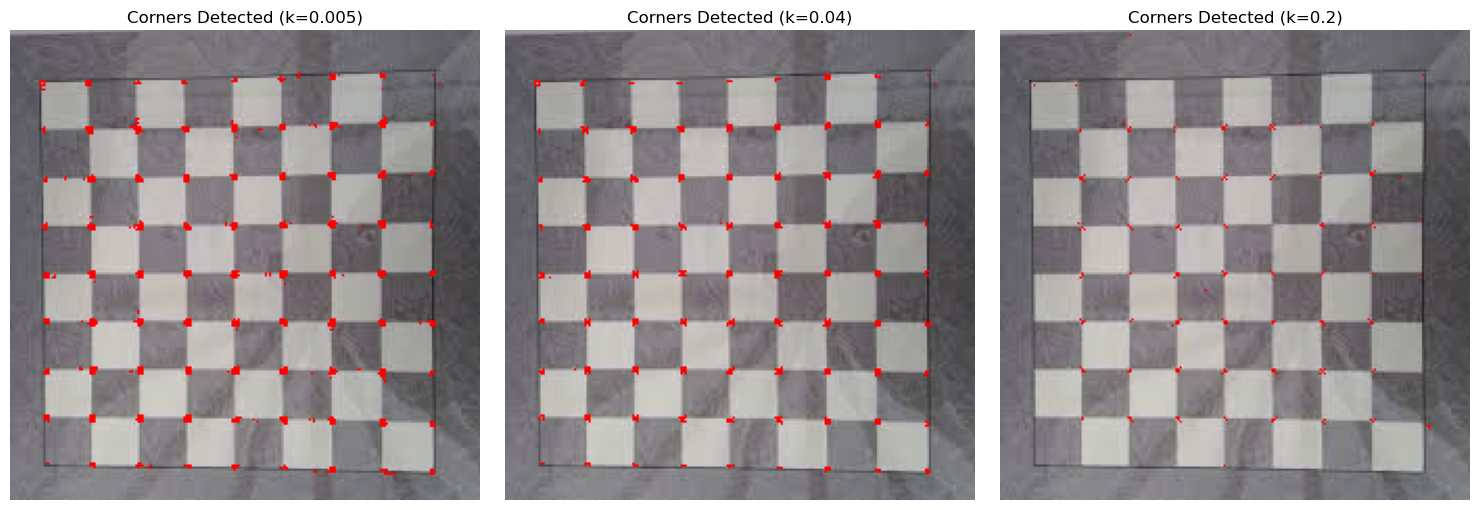

In [109]:
# Experiment with different values of k
ks = [0.005, 0.04, 0.2]
image_path = path+"chess_board.jpeg" 

plt.figure(figsize=(15, 5))
for i, k_value in enumerate(ks):
    _, corner_img = detect_corners_harris(image_path, k=k_value)
    plt.subplot(1, 3, i + 1)
    plt.imshow(cv2.cvtColor(corner_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Corners Detected (k={k_value})")
    plt.axis("off")

plt.tight_layout()
plt.show()


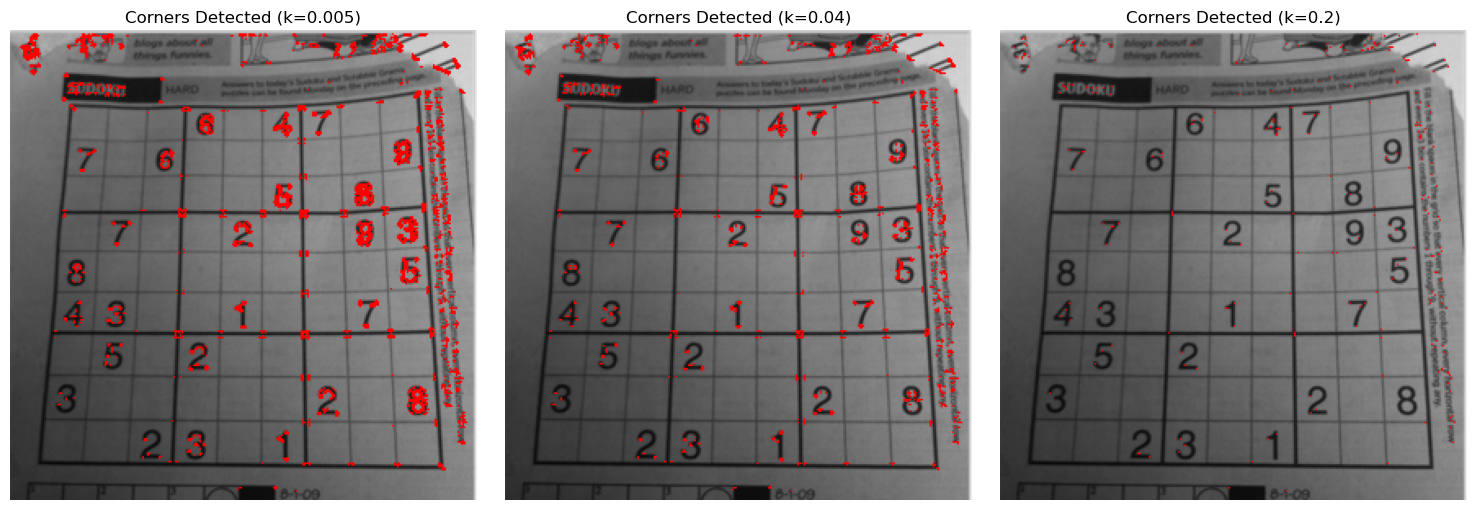

In [ ]:
# Experiment with different values of k
ks = [0.005, 0.04, 0.2]
image_path = path+"noisy_doc.png"  
plt.figure(figsize=(15, 5))
for i, k_value in enumerate(ks):
    _, corner_img = detect_corners_harris(image_path, k=k_value)
    plt.subplot(1, 3, i + 1)
    plt.imshow(cv2.cvtColor(corner_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Corners Detected (k={k_value})")
    plt.axis("off")

plt.tight_layout()
plt.show()


* With k=0.005, many noisy corners were detected, especially along edges.
* With k=0.2, only prominent corners were detected, but some valid corners were missed.
* k=0.04 provided the best balance, detecting true corners without excessive noise.

## Task 5: Short Theory (10 Marks)
 In 100-150 words, explain how the Hough Transform differs when detecting
 lines versus circles in an image. Discuss how parameter space and computa
tional complexity vary between these applications. (10 Marks)

* The Hough Transform detects lines and circles by mapping image points to a parameter space. For lines, the transform uses the equation **r=xcosθ+ysinθ**, where r (distance from origin) and θ (angle) define a line. The parameter space is 2D (r,θ), making computation efficient.  

* For circles, the equation 
**(𝑥−𝑎)^2+(𝑦−𝑏)^2=𝑟^2**
  involves three parameters (a,b,r): center coordinates and radius. This requires a 3D parameter space, significantly increasing computational complexity. The circle detection process involves iterating over all possible center points and radius, demanding more memory and processing time than line detection.

* Line detection is faster and simpler, whereas circle detection requires additional preprocessing (e.g. smoothing) to reduce noise and optimize performance in the higher-dimensional parameter space.